In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad
from glob import glob
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Rawdata analysis

In [2]:
def read_rawdata(filename):
    with open(filename, "r") as F:
        lines = F.readlines()
        xpos = np.array([float(x) for x in lines[0].split(",")[1:]])
        ypos = np.array([float(x) for x in lines[1].split(",")[1:]])
        print(xpos,)
        print(ypos,)
        angl = np.array([float(x) for x in lines[2].split(",")[1:]])
        print(angl,)
        

        # Convert each string into a list of values
        data = [s.split(",") for s in lines[4:]]

        # Convert to DataFrame
        df = pd.DataFrame(data, dtype=float)
        return xpos, ypos, angl, df
        
        
xpos, ypos, angle, df = read_rawdata("Fujitok_Subaru_MB413_Data_Pack_WO_rawdata.csv")
df

[ 30.5  85.9 141.3 196.7 252.1  30.5  85.9 141.3 196.7 252.1  30.5  85.9
 141.3 196.7  30.5  85.9 141.3  30.5  85.9  30.5  85.9 141.3 196.7 252.1
  30.5  85.9 141.3 196.7 252.1  30.5  85.9 141.3 196.7  30.5  85.9 141.3
  30.5  85.9  30.5  85.9 141.3 196.7 252.1  30.5  85.9 141.3 196.7 252.1
  30.5  85.9 141.3 196.7  30.5  85.9 141.3  30.5  85.9  30.5  85.9 141.3
 196.7 252.1  30.5  85.9 141.3 196.7 252.1  30.5  85.9 141.3 196.7  30.5
  85.9 141.3  30.5  85.9  30.5  85.9 141.3 196.7 252.1  30.5  85.9 141.3
 196.7 252.1  30.5  85.9 141.3 196.7  30.5  85.9 141.3  30.5  85.9]
[ 30.5  30.5  30.5  30.5  30.5  85.9  85.9  85.9  85.9  85.9 141.3 141.3
 141.3 141.3 196.7 196.7 196.7 252.1 252.1  30.5  30.5  30.5  30.5  30.5
  85.9  85.9  85.9  85.9  85.9 141.3 141.3 141.3 141.3 196.7 196.7 196.7
 252.1 252.1  30.5  30.5  30.5  30.5  30.5  85.9  85.9  85.9  85.9  85.9
 141.3 141.3 141.3 141.3 196.7 196.7 196.7 252.1 252.1  30.5  30.5  30.5
  30.5  30.5  85.9  85.9  85.9  85.9  85.9 141.3 141.3 1

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,390.0,0.001506,-0.002326,-0.001605,0.001480,0.001491,-0.002222,-0.004446,-0.008318,0.001474,...,-0.006255,0.002503,0.003918,0.004181,0.001569,-0.000321,0.001635,0.001639,0.002232,-1.244632e-03
1,390.1,0.001506,-0.001363,-0.002021,0.001480,0.001491,-0.001503,-0.004260,-0.002374,-0.003802,...,-0.001192,0.002477,0.002268,0.002110,0.003137,0.001357,0.002639,0.002645,-0.001754,-6.521631e-03
2,390.2,0.001506,0.001785,0.001652,0.001480,0.001491,0.001783,-0.007578,-0.006801,0.000042,...,-0.000940,0.000426,0.001885,0.002236,0.001577,0.002142,0.002342,0.002347,-0.002122,-1.732199e-03
3,390.3,0.000062,-0.005987,-0.004422,0.001480,0.001491,-0.005775,0.002537,-0.003238,0.002033,...,0.000374,0.002743,0.000512,0.000153,0.000021,0.001665,0.000227,0.000227,-0.004819,-1.118710e-03
4,390.4,-0.003695,-0.005209,-0.006372,-0.004204,0.001491,-0.005491,-0.000606,0.004041,-0.009179,...,0.002033,0.003118,0.002079,0.002376,0.004746,0.002653,0.003182,0.003189,-0.003381,-9.571980e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,439.6,0.000711,-0.002125,-0.002526,0.001808,-0.000220,-0.002227,0.001649,0.001651,-0.003618,...,-0.002958,0.000149,0.000149,0.000148,0.000148,0.000150,0.000148,0.000149,0.001354,1.807358e-03
497,439.7,-0.003615,0.001012,0.000712,-0.003693,0.000428,0.000969,0.001649,0.001651,-0.001249,...,0.000149,0.000149,0.000149,0.000148,0.000148,0.000150,0.000148,0.000149,0.000489,-2.966509e-03
498,439.8,-0.001160,0.001621,0.001699,-0.000741,0.001795,0.001656,0.001649,0.001651,0.001624,...,0.000149,0.000149,0.000149,0.000148,0.000148,0.000150,0.000148,0.000149,0.001092,-1.765200e-04
499,439.9,-0.003602,0.001496,0.001446,-0.003881,0.000322,0.001506,0.001649,0.001651,0.001428,...,0.000149,0.000149,0.000149,0.000148,0.000148,0.000150,0.000148,0.000149,-0.001428,1.485670e-04


# Calculated data analysis

In [2]:
def get_flux(filter_x, filter_y, flux_x, flux_y, plot=False, ax1=None, ax2=None):
    f1 = interp1d(filter_x, filter_y)
    f2 = interp1d(flux_x, flux_y)
    xmin = np.amax([filter_x.min(), flux_x.min()])
    xmax = np.amin([filter_x.max(), flux_x.max()])
    x = np.linspace(xmin, xmax, 1000)
    flux = np.dot(f1(x), f2(x))/np.sum(f1(x))
    if plot:
        ax1.plot(filter_x, filter_y, "k-")
        ax2.plot(flux_x, flux_y, "r-")
        plt.xlim(xmin, xmax)
    return flux

def get_mag(filter_x, filter_y, flux_x, flux_y, plot=False, ax1=None, ax2=None):
    flux = get_flux(filter_x, filter_y, flux_x, flux_y, plot=plot, ax1=ax1, ax2=ax2)
    mag = -2.5*np.log10(flux)-48.2
    return mag

In [11]:
def read_calcdata(filename):
    df = pd.read_csv(filename)
    return df

flist = np.sort(glob("Fujitok*.csv"))
ifilt = 0

df = pd.read_csv(flist[ifilt])
df

,Wavelength,"30.5, 30.5","85.9, 30.5","141.3, 30.5","196.7, 30.5","252.1, 30.5","30.5, 85.9","85.9, 85.9","141.3, 85.9","196.7, 85.9","252.1, 85.9","30.5, 141.3","85.9, 141.3","141.3, 141.3","196.7, 141.3","30.5, 196.7","85.9, 196.7","141.3, 196.7","30.5, 252.1","85.9, 252.1"
0,490.0,0.1066,0.1177,0.0778,0.0894,0.1239,0.0489,0.0547,0.0555,0.0566,0.0194,0.0569,0.0597,0.0634,0.0737,0.0276,0.0569,0.0890,0.0608,0.0753
1,490.1,0.0737,0.0723,0.0433,0.1669,0.1498,0.0637,0.0136,0.0394,0.0153,0.0425,0.0418,0.0324,0.0316,0.0491,0.0555,0.0193,0.0588,0.0749,0.0762
2,490.2,0.0500,0.0707,0.0869,0.0765,0.0855,0.0399,0.0655,0.0280,0.0273,0.0201,0.0413,0.0732,0.0444,0.0285,0.0455,0.0562,0.0360,0.0858,0.1168
3,490.3,0.0895,0.0782,0.1045,0.0831,0.0447,0.0169,0.0259,0.0220,0.0580,0.0863,0.0741,0.1015,0.0832,0.0619,0.0178,0.0288,0.0187,0.1330,0.1061
4,490.4,0.0909,0.0853,0.0927,0.1447,0.1051,0.0803,0.0136,0.0656,0.0193,0.0820,0.0652,-0.0045,0.0759,0.0655,0.1040,0.0059,0.0218,0.1168,0.1312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,545.6,-0.0149,-0.0060,-0.0380,-0.0499,-0.0935,-0.0877,-0.0245,0.0100,-0.0293,-0.0486,0.0137,-0.0499,0.0065,0.0286,-0.0179,-0.0230,-0.0748,0.0099,-0.0353
557,545.7,-0.0261,-0.0541,-0.0075,0.0085,-0.0628,-0.0615,-0.0118,-0.0715,-0.0421,-0.0571,-0.0256,-0.0373,-0.0369,0.0037,-0.0460,-0.0086,-0.1290,-0.0904,-0.0937
558,545.8,-0.0187,-0.0156,-0.0402,-0.0590,-0.0018,-0.0432,-0.0380,-0.0595,0.0150,-0.0760,-0.0790,-0.0846,-0.0906,-0.0576,-0.0822,-0.0547,-0.0615,-0.0887,-0.0516
559,545.9,-0.0396,-0.0157,-0.0068,-0.0714,-0.0077,-0.0532,-0.0936,-0.0455,-0.0726,-0.0831,-0.0789,-0.0875,-0.0994,-0.0978,-0.0426,-0.0856,-0.0579,0.0209,0.0178


In [69]:
i = 3
dfs[i]["Wavelength"]-np.mean(dfs[i]["Wavelength"])

0     -37.5
1     -37.4
2     -37.3
3     -37.2
4     -37.1
       ... 
746    37.1
747    37.2
748    37.3
749    37.4
750    37.5
Name: Wavelength, Length: 751, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.


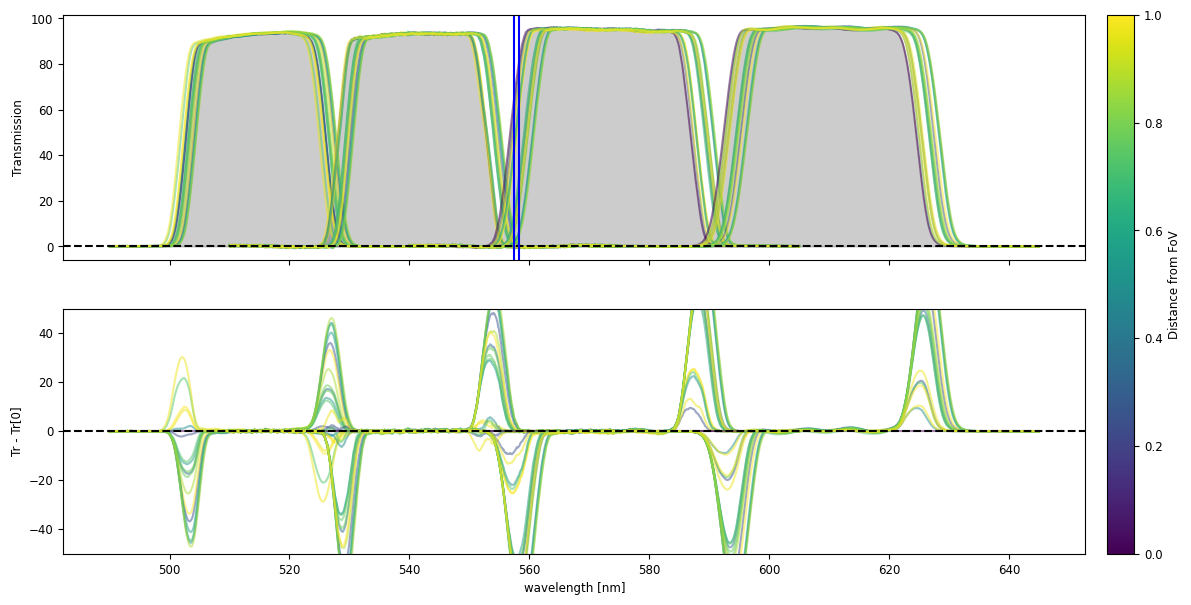

In [97]:
def k2dist(k):
    items = np.array(k.split(", ")).astype(float)-30.5
    dist = np.sqrt(np.sum(items**2))/228.43
    return dist

norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = cm.viridis

"""
plt.figure(figsize=(12,5))
for ifilt in range(4):
    df = pd.read_csv(flist[ifilt])
    for i, k in enumerate(df.keys()[1:]):
        dist = k2dist(k)
        plt.plot(df["Wavelength"], df[k], "r-", alpha=0.5, color=cmap(norm(dist)))
        print (dist)
    plt.fill_between(df["Wavelength"], df["30.5, 30.5"], color="k", alpha=0.2)
plt.axhline(y=0, color="k", ls="--")
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
plt.colorbar(sm, label="distance from the FoV center")
plt.xlabel("wavelength [nm]")
plt.show()

plt.figure(figsize=(12,2))
for ifilt in range(4):
    df = pd.read_csv(flist[ifilt])
    for i, k in enumerate(df.keys()[1:]):
        dist = k2dist(k)
        plt.plot(df["Wavelength"], df[k]-df["30.5, 30.5"], "r-", alpha=0.5, color=cmap(norm(dist)))
plt.axhline(y=0, color="k", ls="--")
#sm = cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([]) 
#plt.colorbar(sm, label="distance from the FoV center")
plt.xlabel("wavelength [nm]")
plt.show()
"""

fig, (ax1, ax2) = plt.subplots(
    2, 1,
    sharex=True,
    gridspec_kw={"height_ratios": [2, 2]},
    figsize=(15, 7)
)

for ifilt in range(4):
    df = pd.read_csv(flist[ifilt])
    for i, k in enumerate(df.keys()[1:]):
        dist = k2dist(k)
        ax1.plot(df["Wavelength"], df[k], "r-", alpha=0.5, color=cmap(norm(dist)))
        #print (dist)
    ax1.fill_between(df["Wavelength"], df["30.5, 30.5"], color="k", alpha=0.2)
ax1.axhline(y=0, color="k", ls="--")

ax1.axvline(x=557.4, color="b")
ax1.axvline(x=558.2, color="b")

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
#ax1.colorbar(sm, label="distance from the FoV center")

for ifilt in range(4):
    df = pd.read_csv(flist[ifilt])
    for i, k in enumerate(df.keys()[1:]):
        dist = k2dist(k)
        ax2.plot(df["Wavelength"], df[k]-df["30.5, 30.5"], "r-", alpha=0.5, color=cmap(norm(dist)))
ax2.axhline(y=0, color="k", ls="--")



# プロット（例として imshow）
#im1 = ax1.imshow(Z1, aspect='auto', origin='lower', extent=[0,10,0,5])
#im2 = ax2.imshow(Z2, aspect='auto', origin='lower', extent=[0,10,0,5])

# 共通 colorbar（2つのAxをまとめて指定）
fig.subplots_adjust(right=0.85)  # 0.85〜0.9くらいで調整
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', fraction=0.04, pad=0.02)
cbar.set_label("Distance from FoV")

ax1.set_ylabel("Transmission")
ax2.set_ylabel("Tr - Tr[0]")
ax2.set_xlabel("wavelength [nm]")
ax2.set_ylim(-50,50)

plt.show()

In [13]:
lbgs = np.loadtxt("../lbg_z3.txt")

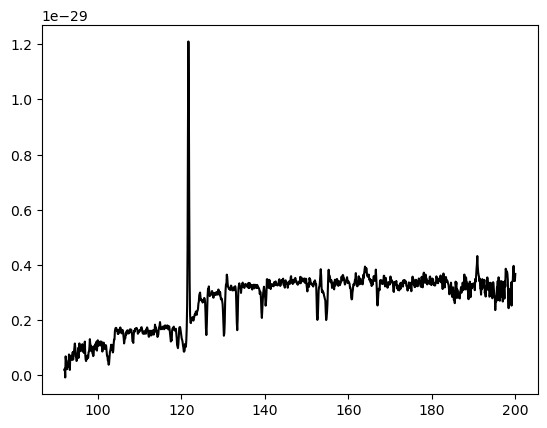

In [14]:
z = 0
wl = lbgs[:,0]/10*(1+z)
fl = lbgs[:,1]
plt.plot(wl, fl, "k-")

In [54]:
ifilt = 2
df = pd.read_csv(flist[ifilt])

25.75375369490108
25.72822162606505


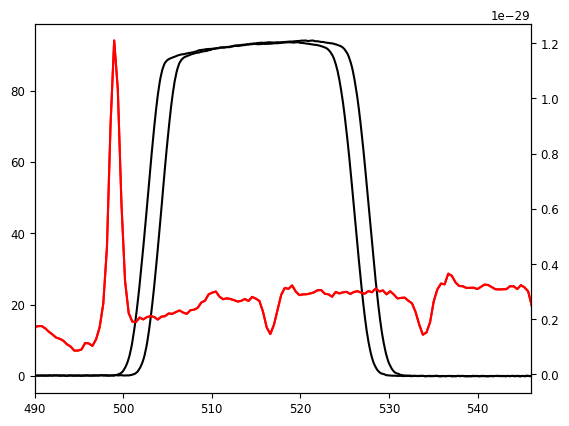

26.34709281357003
26.319147140164503


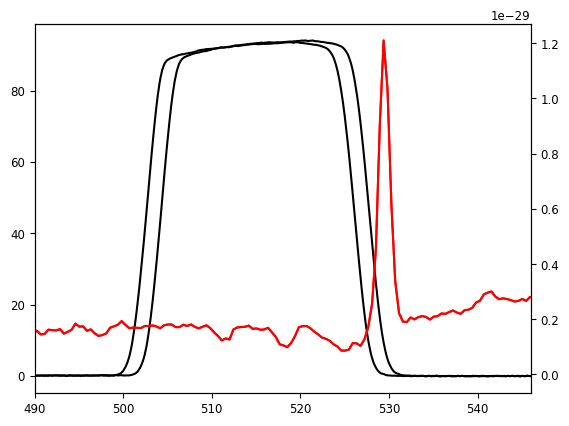

25.635918547185355
25.74049535632659


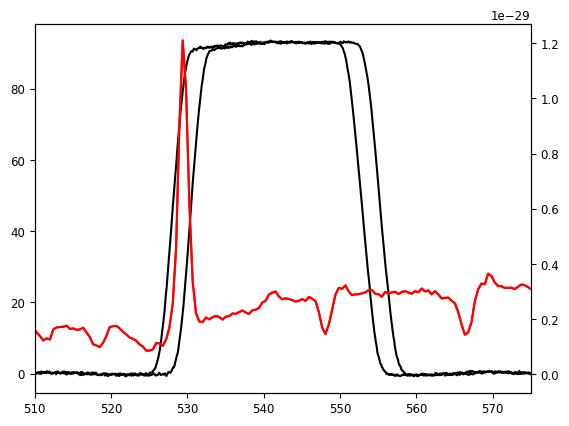

26.244903327309245
26.02996439640131


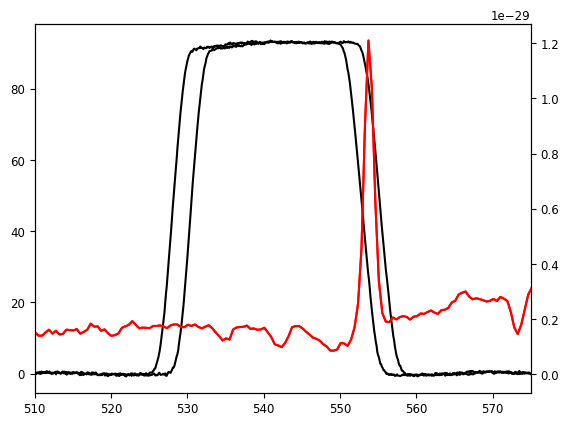

25.74117188860542
25.712527203015554


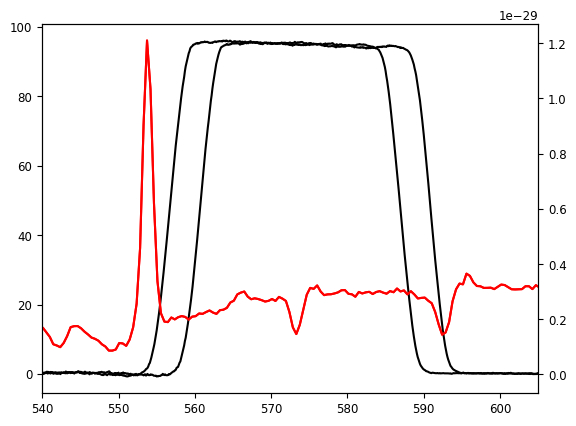

26.32743872407532
26.115730602698946


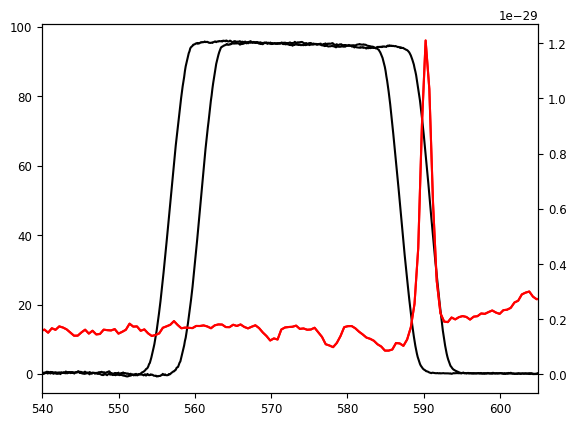

25.73210803877582
25.71989332522216


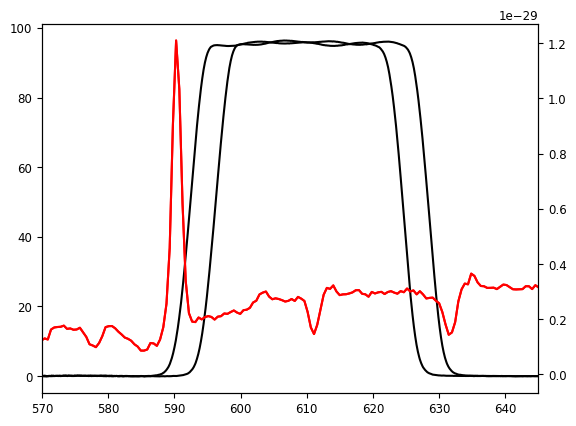

26.307359428576078
26.057070844504963


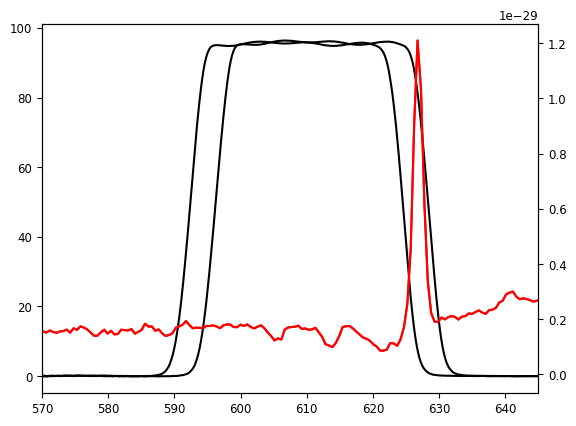

In [78]:
#zs = [2.3, 2.5, 2.7, 2.9, 3.1]
zs = [3.1, 3.35, 3.55, 3.85, 4.15]

for ifilt in range(4):
    z1 = zs[ifilt]
    wl = lbgs[:,0]/10*(1+z1)
    fl = lbgs[:,1]
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    print (get_mag(dfs[ifilt]["Wavelength"], dfs[ifilt]["30.5, 30.5"]  , wl, fl, plot=True, ax1=ax1, ax2=ax2))
    print (get_mag(dfs[ifilt]["Wavelength"], dfs[ifilt]["141.3, 141.3"], wl, fl, plot=True, ax1=ax1, ax2=ax2))
    plt.show()
    plt.close(fig)

    z2 = zs[ifilt+1]
    wl = lbgs[:,0]/10*(1+z2)
    fl = lbgs[:,1]
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    print (get_mag(dfs[ifilt]["Wavelength"], dfs[ifilt]["30.5, 30.5"]  , wl, fl, plot=True, ax1=ax1, ax2=ax2))
    print (get_mag(dfs[ifilt]["Wavelength"], dfs[ifilt]["141.3, 141.3"], wl, fl, plot=True, ax1=ax1, ax2=ax2))
    plt.show()
    plt.close(fig)

In [43]:
df.keys()

Index(['Wavelength', '30.5, 30.5', '85.9, 30.5', '141.3, 30.5', '196.7, 30.5',
       '252.1, 30.5', '30.5, 85.9', '85.9, 85.9', '141.3, 85.9', '196.7, 85.9',
       '252.1, 85.9', '30.5, 141.3', '85.9, 141.3', '141.3, 141.3',
       '196.7, 141.3', '30.5, 196.7', '85.9, 196.7', '141.3, 196.7',
       '30.5, 252.1', '85.9, 252.1'],
      dtype='object')

In [44]:
pos=df.keys()[1:]
radi = np.array([
    np.sqrt(float(x)**2+float(y)**2) for s in pos for (x,y) in [s.split(",")]
])
idx = np.argsort(radi)
idx

array([ 0,  1,  5,  6,  2, 10,  7, 11,  3, 14, 12,  8, 15, 13, 16,  4, 17,
        9, 18])

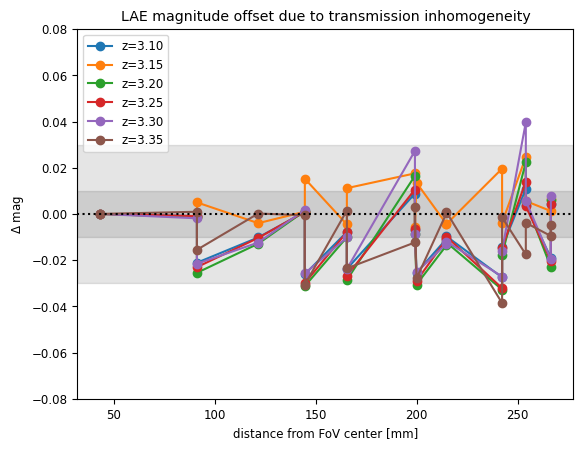

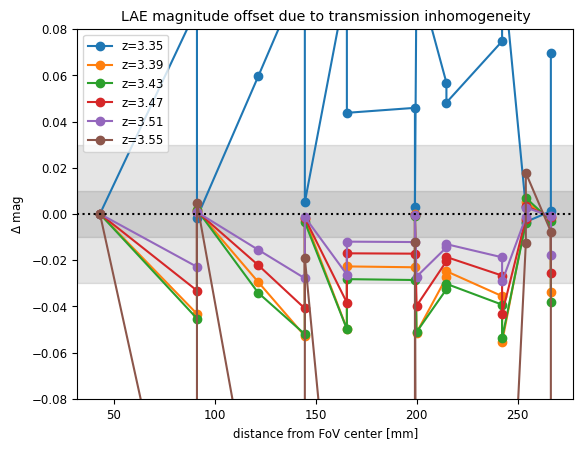

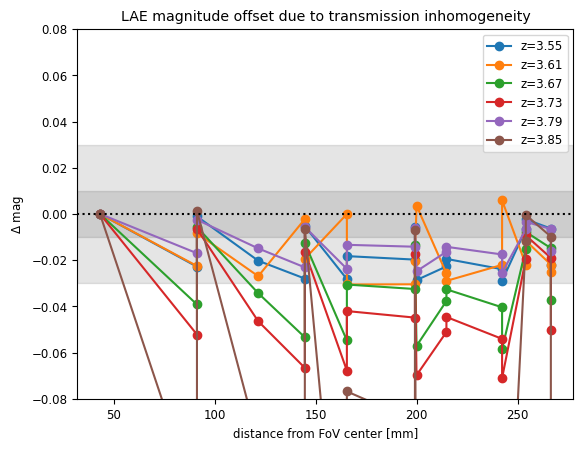

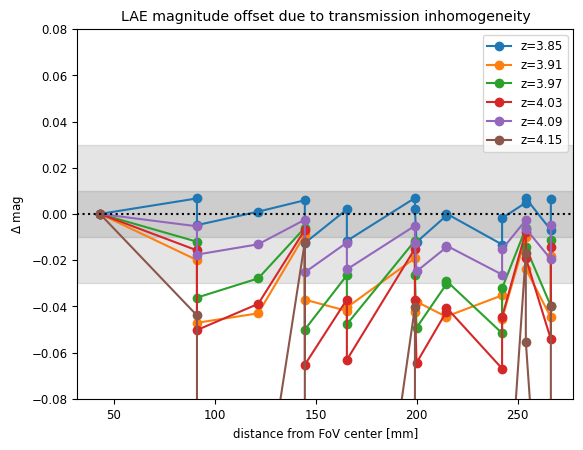

In [79]:
for ifilt in range(4):
    
    z1 = zs[ifilt]
    z2 = zs[ifilt+1]
    
    plt.clf()
    zarr = np.linspace(z1, z2, 6)

    for iz, z in enumerate(zarr):
        wl = lbgs[:,0]/10*(1+z)
        fl = lbgs[:,1]
        mags = []
        for ik, k in enumerate(pos[idx]):
            mag = get_mag(dfs[ifilt]["Wavelength"], dfs[ifilt][k], wl, fl, plot=False)
            mags.append(mag)
        plt.plot(radi[idx], mags-mags[0], "C%io-"%(iz%9), label="z=%.2f"%z)
    plt.legend()
    plt.title("LAE magnitude offset due to transmission inhomogeneity")
    plt.xlabel("distance from FoV center [mm]")
    plt.ylabel(r"$\Delta$ mag")
    plt.ylim(-0.08,0.08)
    plt.axhspan(ymin=-0.03, ymax=0.03, color="k", alpha=0.1)
    plt.axhspan(ymin=-0.01, ymax=0.01, color="k", alpha=0.1)
    plt.axhline(y=0, ls=":", color="k")
    plt.show()

# Maximum mag offset detection

In [47]:
dfs = []
for f in np.sort(glob("Fujitok*.csv")):
    print (f)
    df = pd.read_csv(f)
    print (df.shape)
    dfs.append(df)

Fujitok_Subaru MB516 Data Pack WO#217659.csv
(561, 20)
Fujitok_Subaru MB543 Data Pack WO#217659.csv
(651, 20)
Fujitok_Subaru MB575 Data Pack WO#217659.csv
(651, 20)
Fujitok_Subaru MB611 Data Pack WO#217659.csv
(751, 20)


In [22]:
dfs[0]

,Wavelength,"30.5, 30.5","85.9, 30.5","141.3, 30.5","196.7, 30.5","252.1, 30.5","30.5, 85.9","85.9, 85.9","141.3, 85.9","196.7, 85.9","252.1, 85.9","30.5, 141.3","85.9, 141.3","141.3, 141.3","196.7, 141.3","30.5, 196.7","85.9, 196.7","141.3, 196.7","30.5, 252.1","85.9, 252.1"
0,490.0,0.1066,0.1177,0.0778,0.0894,0.1239,0.0489,0.0547,0.0555,0.0566,0.0194,0.0569,0.0597,0.0634,0.0737,0.0276,0.0569,0.0890,0.0608,0.0753
1,490.1,0.0737,0.0723,0.0433,0.1669,0.1498,0.0637,0.0136,0.0394,0.0153,0.0425,0.0418,0.0324,0.0316,0.0491,0.0555,0.0193,0.0588,0.0749,0.0762
2,490.2,0.0500,0.0707,0.0869,0.0765,0.0855,0.0399,0.0655,0.0280,0.0273,0.0201,0.0413,0.0732,0.0444,0.0285,0.0455,0.0562,0.0360,0.0858,0.1168
3,490.3,0.0895,0.0782,0.1045,0.0831,0.0447,0.0169,0.0259,0.0220,0.0580,0.0863,0.0741,0.1015,0.0832,0.0619,0.0178,0.0288,0.0187,0.1330,0.1061
4,490.4,0.0909,0.0853,0.0927,0.1447,0.1051,0.0803,0.0136,0.0656,0.0193,0.0820,0.0652,-0.0045,0.0759,0.0655,0.1040,0.0059,0.0218,0.1168,0.1312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,545.6,-0.0149,-0.0060,-0.0380,-0.0499,-0.0935,-0.0877,-0.0245,0.0100,-0.0293,-0.0486,0.0137,-0.0499,0.0065,0.0286,-0.0179,-0.0230,-0.0748,0.0099,-0.0353
557,545.7,-0.0261,-0.0541,-0.0075,0.0085,-0.0628,-0.0615,-0.0118,-0.0715,-0.0421,-0.0571,-0.0256,-0.0373,-0.0369,0.0037,-0.0460,-0.0086,-0.1290,-0.0904,-0.0937
558,545.8,-0.0187,-0.0156,-0.0402,-0.0590,-0.0018,-0.0432,-0.0380,-0.0595,0.0150,-0.0760,-0.0790,-0.0846,-0.0906,-0.0576,-0.0822,-0.0547,-0.0615,-0.0887,-0.0516
559,545.9,-0.0396,-0.0157,-0.0068,-0.0714,-0.0077,-0.0532,-0.0936,-0.0455,-0.0726,-0.0831,-0.0789,-0.0875,-0.0994,-0.0978,-0.0426,-0.0856,-0.0579,0.0209,0.0178


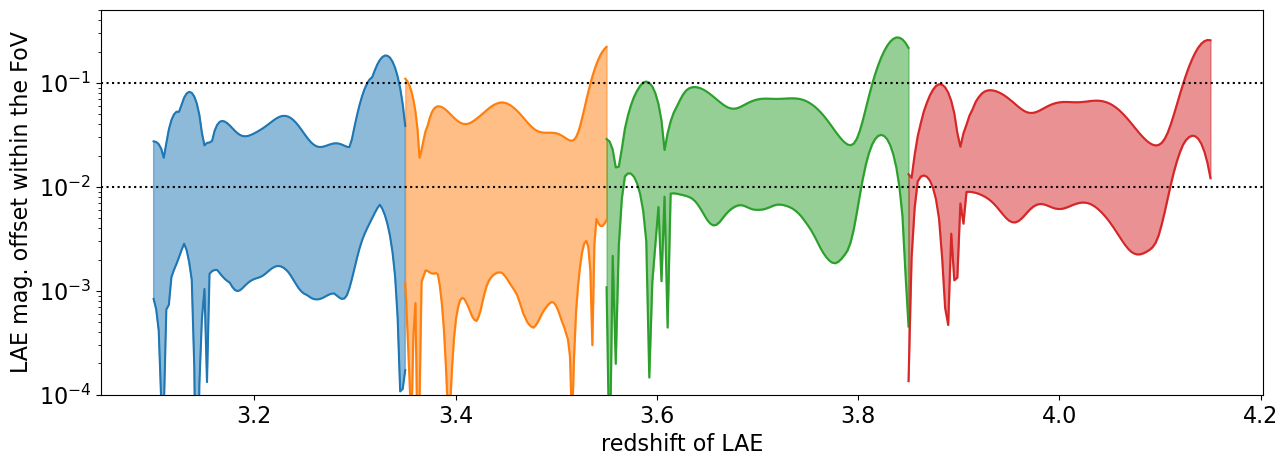

In [80]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 16}) 

plt.figure(figsize=(15,5))
for ifilt in range(4):
    z1 = zs[ifilt  ]
    z2 = zs[ifilt+1]
    z = np.linspace(z1, z2, 100)
    dmags_min, dmags_max = [], []
    for zz in z:
        wl = lbgs[:,0]/10*(1+zz)
        fl = lbgs[:,1]
        
        dmags = []
        for ik, k in enumerate(pos[idx]):
            ff = dfs[ifilt][k]
            dmag = get_mag(dfs[ifilt]["Wavelength"], ff, wl, fl, plot=False)
            #print (dmag)
            dmags.append(dmag)
        dmags = np.array(dmags)
        dmags -= dmags[0]
        dmags_min.append(np.abs(dmags[1:]).min())
        dmags_max.append(np.abs(dmags).max())
        
        
    plt.plot(z, dmags_min, "C%i-"%ifilt)
    plt.plot(z, dmags_max, "C%i-"%ifilt)
    plt.fill_between(z, dmags_min, dmags_max, color="C%i"%ifilt, alpha=0.5)
plt.yscale("log")
plt.axhline(y=0.1, color="k", ls=":")
plt.axhline(y=0.01, color="k", ls=":")
plt.ylabel("LAE mag. offset within the FoV")
plt.xlabel("redshift of LAE")
plt.ylim(ymin=1e-4)
plt.show()

## Spacial Distribution

In [56]:
def edges(c):
    c = np.asarray(c)
    mid = (c[:-1] + c[1:]) / 2
    first = c[0] - (c[1]-c[0]) / 2
    last  = c[-1] + (c[-1]-c[-2]) / 2
    return np.r_[first, mid, last]

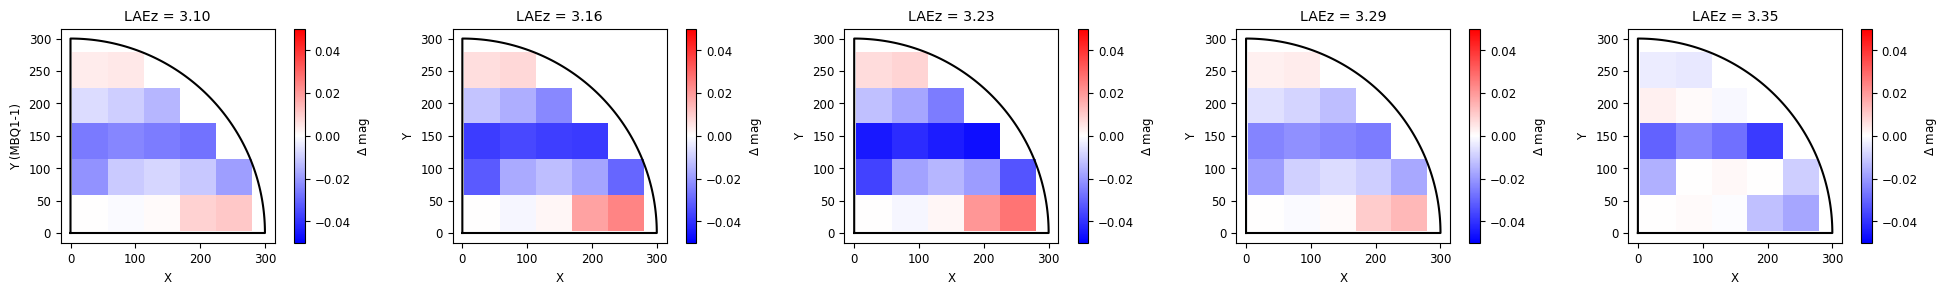

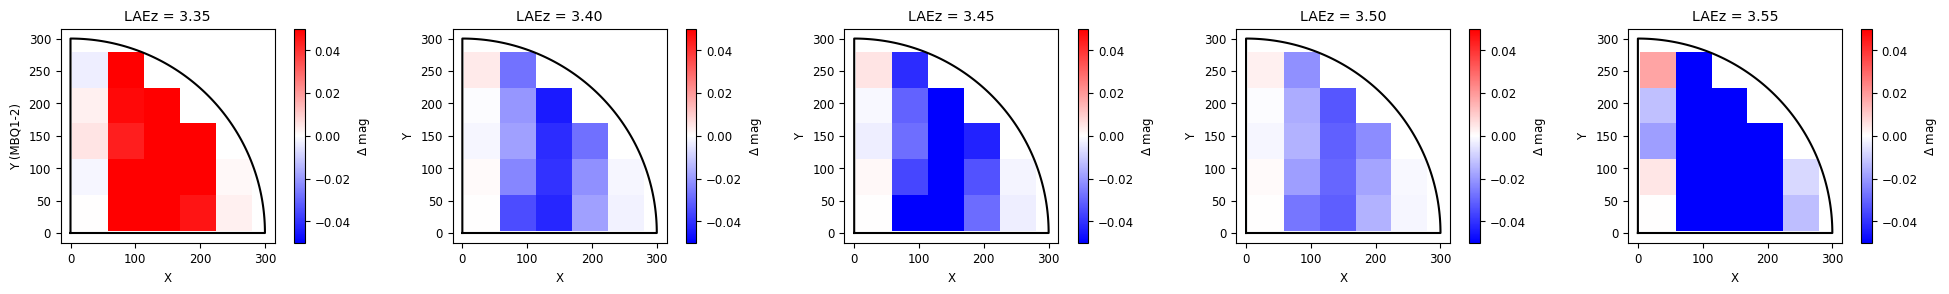

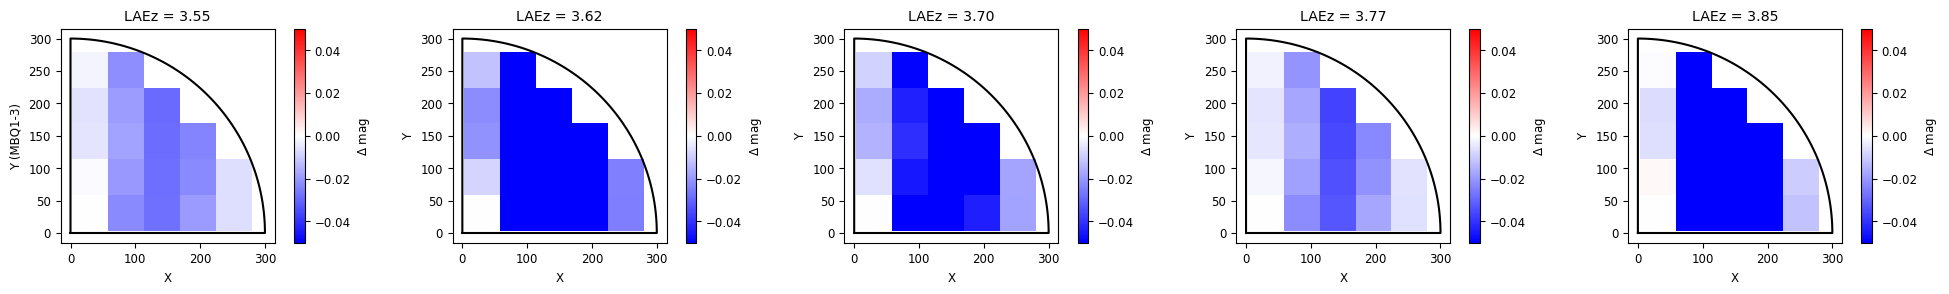

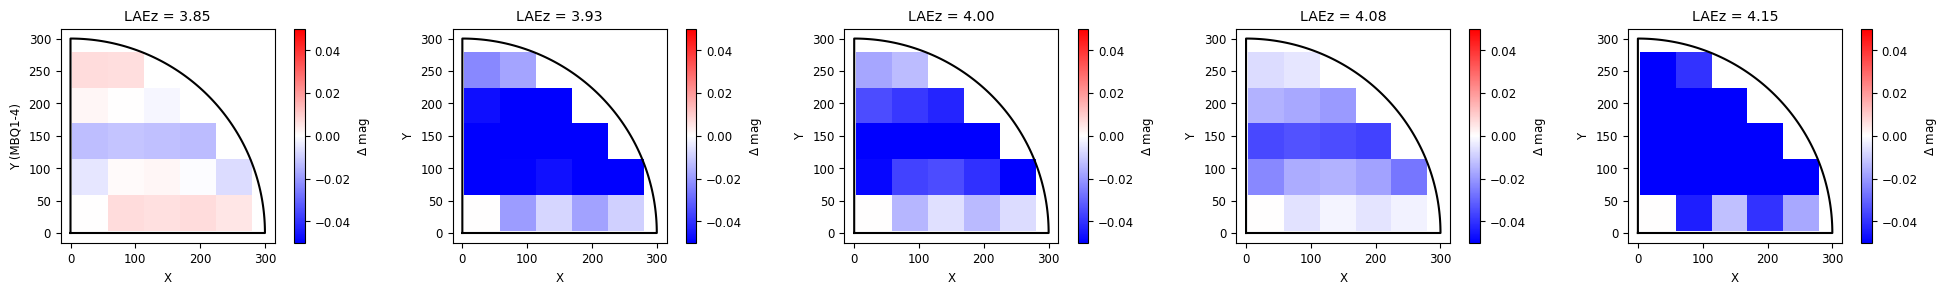

In [81]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 8.5})
t = np.linspace(0, np.pi/2, 100)
xc, yc = np.cos(t)*300, np.sin(t)*300.
xc = np.append([0], np.append(xc, [0]))
yc = np.append([0], np.append(yc, [0]))

for ifilt in range(4):
    
    plt.figure(figsize=(20,3))
    
    z1 = zs[ifilt  ]
    z2 = zs[ifilt+1]
    z = np.linspace(z1, z2, 5)
    dmags_min, dmags_max = [], []
    for iz, zz in enumerate(z):
        plt.subplot(1,5,iz+1, aspect=1.)
        wl = lbgs[:,0]/10*(1+zz)
        fl = lbgs[:,1]
        
        dmags = []
        xs, ys = [], []
        for ik, k in enumerate(pos[idx]):
            ff = dfs[ifilt][k]
            dmag = get_mag(dfs[ifilt]["Wavelength"], ff, wl, fl, plot=False)
            
            if ik==0:
                dmag0 = dmag
                dmag = 0
            else:
                dmag -= dmag0
            dmags.append(dmag)
                
            x, y = np.array(k.split(",")).astype(float)
            xs.append(x); ys.append(y)
            

        df = pd.DataFrame({'x': xs, 'y': ys, 'z': dmags})
        pv = df.pivot(index='y', columns='x', values='z').sort_index().sort_index(axis=1)
        xe = edges(pv.columns.values)
        ye = edges(pv.index.values)
        #vmax = np.amax(np.abs(dmags))
        #vmin = -vmax
        vmax = 0.05
        vmin = -0.05
        plt.pcolormesh(xe, ye, pv.values, shading='auto', cmap="bwr", vmin=vmin, vmax=vmax)
        plt.colorbar(label=r'$\Delta$ mag')
        plt.xlabel('X'); plt.ylabel('Y'); plt.tight_layout()
        plt.title("LAEz = %.2f"%zz)
        if iz == 0:
            plt.ylabel("Y (MBQ1-%i)"%(ifilt+1) )
        
        #plt.scatter(xs, ys, c=dmags, s=1300, marker="s")
        #plt.colorbar()
        plt.plot(xc, yc, "k-")
    plt.show()
        
        
#plt.yscale("log")
#plt.axhline(y=0.1, color="k", ls=":")
#plt.axhline(y=0.01, color="k", ls=":")
#plt.ylabel("LAE mag. offset within the FoV")
#plt.xlabel("redshift of LAE")
#plt.ylim(ymin=1e-4)
#plt.show()

# Basic statistics

In [96]:
for ifilt in range(4):
    print (f"ifilt={ifilt}")
    wl = dfs[ifilt]["Wavelength"]
    means = []
    for ik, k in enumerate(pos[idx]):
        ff = dfs[ifilt][k]

        mean_wl = np.dot(wl, ff)/np.sum(ff)
        if ik==0:
            mean_wl0 = mean_wl
        means.append(mean_wl)

        print (f"  pos={k:12s} mean={mean_wl:.2f}, delta mean={(mean_wl-mean_wl0):.2f}")
    means = np.array(means)
    mm = np.mean(means)
    print (mm, 2*np.std(means), means.max()-mm, mm-means.min())

ifilt=0
  pos=30.5, 30.5   mean=514.36, delta mean=0.00
  pos=85.9, 30.5   mean=514.43, delta mean=0.07
  pos=30.5, 85.9   mean=515.75, delta mean=1.38
  pos=85.9, 85.9   mean=515.04, delta mean=0.67
  pos=141.3, 30.5  mean=514.30, delta mean=-0.06
  pos=30.5, 141.3  mean=516.08, delta mean=1.72
  pos=141.3, 85.9  mean=514.89, delta mean=0.52
  pos=85.9, 141.3  mean=515.93, delta mean=1.56
  pos=196.7, 30.5  mean=513.58, delta mean=-0.79
  pos=30.5, 196.7  mean=514.82, delta mean=0.45
  pos=141.3, 141.3 mean=516.04, delta mean=1.68
  pos=196.7, 85.9  mean=515.08, delta mean=0.71
  pos=85.9, 196.7  mean=515.01, delta mean=0.64
  pos=196.7, 141.3 mean=516.17, delta mean=1.81
  pos=141.3, 196.7 mean=515.30, delta mean=0.94
  pos=252.1, 30.5  mean=513.31, delta mean=-1.06
  pos=30.5, 252.1  mean=514.11, delta mean=-0.25
  pos=252.1, 85.9  mean=515.60, delta mean=1.24
  pos=85.9, 252.1  mean=514.05, delta mean=-0.31
514.939648290391 1.6720503211733522 1.2349203062343577 1.6343047682204315
i

In [102]:
def original_transmission(lam, lam_b90, lam_r90, k=5.0):
    LOGIT_09 = np.log(0.9 / 0.1)  # ln(9) ≈ 2.197224
    """
    Analytic filter transmission as product of two sigmoids.
    
    Parameters
    ----------
    lam : array
        Wavelength [same unit as lam_b90, lam_r90].
    lam_b90 : float
        Wavelength where transmission is 90% on the blue side.
    lam_r90 : float
        Wavelength where transmission is 90% on the red side.
    k : float
        Steepness parameter (larger -> steeper edges).
    """
    # 50% points (from the 90% points)
    m_b = lam_b90 - LOGIT_09 / k
    m_r = lam_r90 + LOGIT_09 / k

    S_blue = 1.0 / (1.0 + np.exp(-k * (lam - m_b)))
    S_red  = 1.0 / (1.0 + np.exp( k * (lam - m_r)))
    
    return S_blue * S_red

In [115]:
blue90 = [505.08, 530.96, 559.43, 594.16]
red90  = [528.64, 556.32, 591.85, 628.64]
#cwl = np.array(blue90)+np.array(red90)
#cwl /= 2
cwl = [516.86, 543.63, 575.64, 611.40]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  


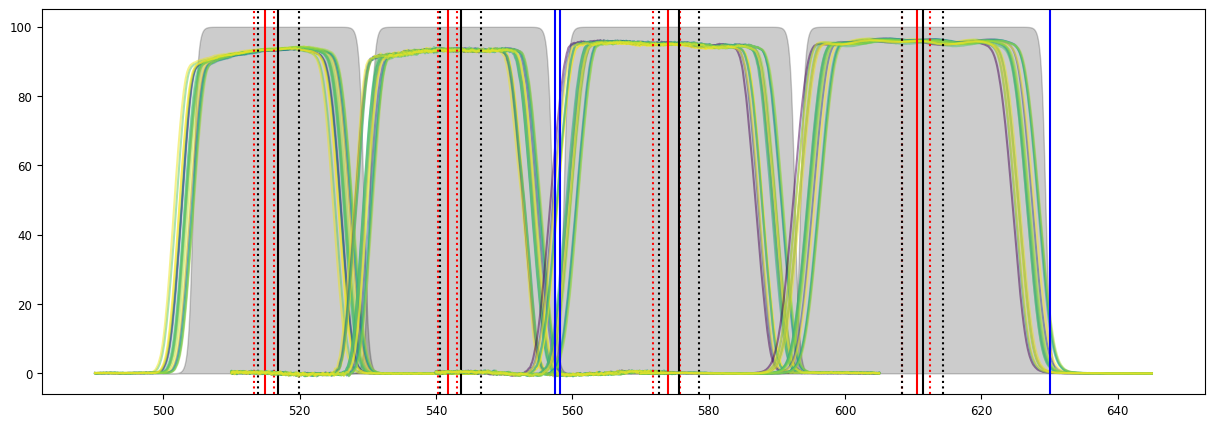

In [119]:
korg = 3

fig = plt.figure(figsize=(15,5))
for ifilt in range(4):
    df = pd.read_csv(flist[ifilt])
    for i, k in enumerate(df.keys()[1:]):
        dist = k2dist(k)
        plt.plot(df["Wavelength"], df[k], "r-", alpha=0.5, color=cmap(norm(dist)))
    #plt.fill_between(df["Wavelength"], df["30.5, 30.5"], color="k", alpha=0.2)
    
    tr = 100*original_transmission(df["Wavelength"], blue90[ifilt], red90[ifilt], k=korg)
    plt.fill_between(df["Wavelength"], tr, color="k", alpha=0.2)
    
    
    # CWL
    wl = dfs[ifilt]["Wavelength"]
    means = []
    for ik, k in enumerate(pos[idx]):
        ff = dfs[ifilt][k]

        mean_wl = np.dot(wl, ff)/np.sum(ff)
        if ik==0:
            mean_wl0 = mean_wl
        means.append(mean_wl)

    means = np.array(means)
    mm = np.mean(means)
    plt.axvline(x=mm, color="r", ls="-")
    plt.axvline(x=means.min(), color="r", ls=":")
    plt.axvline(x=means.max(), color="r", ls=":")
    plt.axvline(x=cwl[ifilt], color="k", ls="-")
    plt.axvline(x=cwl[ifilt]-3, color="k", ls=":")
    plt.axvline(x=cwl[ifilt]+3, color="k", ls=":")
    
    
    
plt.axvline(x=557.4, color="b")
plt.axvline(x=558.2, color="b")
plt.axvline(x=630.0, color="b")

plt.show()